<a href="https://colab.research.google.com/github/Seth-Ese/Dicom_CT_Scan_work/blob/main/Test_CNN_Dicom_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
%cd "/content/drive/My Drive/CT Scan Image/dicom_dir/"


/content/drive/My Drive/CT Scan Image/dicom_dir


In [31]:
ls

ID_0000_AGE_0060_CONTRAST_1_CT.dcm  ID_0050_AGE_0074_CONTRAST_0_CT.dcm
ID_0001_AGE_0069_CONTRAST_1_CT.dcm  ID_0051_AGE_0063_CONTRAST_0_CT.dcm
ID_0002_AGE_0074_CONTRAST_1_CT.dcm  ID_0052_AGE_0072_CONTRAST_0_CT.dcm
ID_0003_AGE_0075_CONTRAST_1_CT.dcm  ID_0053_AGE_0073_CONTRAST_0_CT.dcm
ID_0004_AGE_0056_CONTRAST_1_CT.dcm  ID_0054_AGE_0082_CONTRAST_0_CT.dcm
ID_0005_AGE_0048_CONTRAST_1_CT.dcm  ID_0055_AGE_0071_CONTRAST_0_CT.dcm
ID_0006_AGE_0075_CONTRAST_1_CT.dcm  ID_0056_AGE_0083_CONTRAST_0_CT.dcm
ID_0007_AGE_0061_CONTRAST_1_CT.dcm  ID_0057_AGE_0049_CONTRAST_0_CT.dcm
ID_0008_AGE_0051_CONTRAST_1_CT.dcm  ID_0058_AGE_0082_CONTRAST_0_CT.dcm
ID_0009_AGE_0048_CONTRAST_1_CT.dcm  ID_0059_AGE_0074_CONTRAST_0_CT.dcm
ID_0010_AGE_0060_CONTRAST_1_CT.dcm  ID_0060_AGE_0080_CONTRAST_0_CT.dcm
ID_0011_AGE_0061_CONTRAST_1_CT.dcm  ID_0061_AGE_0074_CONTRAST_0_CT.dcm
ID_0012_AGE_0061_CONTRAST_1_CT.dcm  ID_0062_AGE_0067_CONTRAST_0_CT.dcm
ID_0013_AGE_0060_CONTRAST_1_CT.dcm  ID_0063_AGE_0073_CONTRAST_0_CT.dcm
ID_001

In [32]:
!pip install pydicom

In [33]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pydicom
import os
import matplotlib.pyplot as plt


Reading one dicom file, to see how it looks like

In [34]:
single_dicom_path = '/content/drive/My Drive/CT Scan Image/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm'

In [35]:
dic_file=pydicom.read_file(single_dicom_path)

In [36]:
dic_file.Rows

512

In [37]:
for elem in dic_file:
    print(elem)


(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0008, 0020) Study Date                          DA: '19830708'
(0008, 0021) Series Date                         DA: '19830708'
(0008, 0022) Acquisition Date                    DA: '19830708'
(0008, 0023) Content Date                        DA: '19830708'
(0008, 0030) Study Time                          TM: '085723.000000'
(0008, 0031) Series Time                         TM: '090344.332000'
(0008, 0032) Acquisition Time                    TM: '090517.558000'
(0008, 0033) Content Time                        TM: '090501.593000'
(0008, 0040) Data Set Type                       US: 0
(0008, 0041) Dat

In [38]:
#coverting to pixel array
np_dic_file=dic_file.pixel_array

In [39]:
np_dic_file.shape

(512, 512)

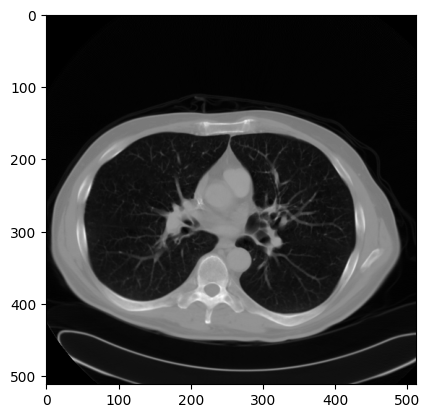

In [40]:
plt.imshow(np_dic_file, cmap='gray')
plt.show()

In [41]:
#importin cv2 for resizing
import cv2

The code bellow was written by me to covert the dicom images to nupy folder

In [42]:
#Coverting all dic to numpy numpy array and saving in the folder

#source and target folder paths
source_folder = '/content/drive/My Drive/CT Scan Image/dicom_dir/'
target_folder = '/content/drive/My Drive/CT Scan Image/numpy_dir/'


# Create the target folder if it doesn't exist
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# Loop through each file in the source folder
for filename in os.listdir(source_folder):
    if filename.lower().endswith('.dcm'):  # Check if the file is a DICOM file
        file_path = os.path.join(source_folder, filename)

        # Read the DICOM file using pydicom
        dicom_data = pydicom.dcmread(file_path)

        # Check if the DICOM file contains pixel data
        if 'PixelData' in dicom_data:
            # Convert the pixel data to a numpy array
            np_image = dicom_data.pixel_array

            # Resize the image to 256x256 using cv2
            resized_image = cv2.resize(np_image, (256, 256), interpolation=cv2.INTER_AREA)

            # Construct the output file path
            output_file_path = os.path.join(target_folder, os.path.splitext(filename)[0] + '.npy')

            # Save the numpy array to a .npy file
            np.save(output_file_path, resized_image)

print("Conversion and resizing to .npy format completed.")


Conversion and resizing to .npy format completed.


In [43]:


# numpy pathway folder
npy_folder = '/content/drive/My Drive/CT Scan Image/numpy_dir/'

# Load images and labels
images=[]

for filename in os.listdir(npy_folder):
    if filename.endswith('.npy'):
        # Load the numpy array
        img_array = np.load(os.path.join(npy_folder, filename))

        # Add the image to your dataset
        images.append(img_array)






In [46]:
# Convert lists to numpy arrays
X = np.array(images)
X = X.reshape(100,256,256,1)
X.shape

(100, 256, 256, 1)

In [48]:
#extracting only the label path
labels = []
for file in os.listdir(npy_folder):
    labels.append(file.split('_')[-2])

Y=np.array(labels)
Y.shape

(100,)

In [49]:

from sklearn.model_selection import train_test_split

In [60]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")


Dataset split into training and testing sets.


In [61]:
X_train.max()

4095

In [62]:
X_test.max()

4095

In [63]:
# normalizing
X_train_normalized = X_train / 4095.0
X_test_normalized = X_test / 4095.0


In [64]:
X_train_normalized.shape

(80, 256, 256, 1)

In [65]:
import tensorflow as tf

y_train= tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [68]:
from keras import layers, models, regularizers

In [69]:
model = models.Sequential()

model.add(layers.Conv2D(64 ,(3,3) , padding = 'same' , kernel_regularizer=regularizers.l2(0.0001) , input_shape = (256,256,1)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(512 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(512 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(4096 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(2, activation='sigmoid') )

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 activation (Activation)     (None, 256, 256, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 256, 256, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                        

In [72]:
import tensorflow as tf

sgd = tf.keras.optimizers.SGD(0.001)
model.compile(loss='categorical_crossentropy' , optimizer=sgd , metrics=['accuracy'])

In [73]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             brightness_range = (0.5, 1.5))

In [113]:
his=model.fit(datagen.flow(X_train_normalized,y_train,batch_size=10),
         epochs=100,
         validation_data=datagen.flow(X_test_normalized,y_test))

Epoch 1/100
8/8 [==============================] - 3s 321ms/step - loss: 1.1505 - accuracy: 0.6500 - val_loss: 1.3520 - val_accuracy: 0.5500
Epoch 2/100
8/8 [==============================] - 2s 261ms/step - loss: 1.1483 - accuracy: 0.5875 - val_loss: 1.3514 - val_accuracy: 0.5500
Epoch 3/100
8/8 [==============================] - 2s 266ms/step - loss: 1.1426 - accuracy: 0.6750 - val_loss: 1.3498 - val_accuracy: 0.5500
Epoch 4/100
8/8 [==============================] - 2s 279ms/step - loss: 1.1529 - accuracy: 0.5125 - val_loss: 1.3482 - val_accuracy: 0.5500
Epoch 5/100
8/8 [==============================] - 2s 280ms/step - loss: 1.1523 - accuracy: 0.5375 - val_loss: 1.3462 - val_accuracy: 0.5500
Epoch 6/100
8/8 [==============================] - 2s 270ms/step - loss: 1.1475 - accuracy: 0.5750 - val_loss: 1.3431 - val_accuracy: 0.5500
Epoch 7/100
8/8 [==============================] - 2s 269ms/step - loss: 1.1616 - accuracy: 0.6500 - val_loss: 1.3407 - val_accuracy: 0.5500
Epoch 8/100
8

In [114]:
model.evaluate(datagen.flow(X_train_normalized,y_train))

3/3 [==============================] - 1s 186ms/step - loss: 1.3181 - accuracy: 0.4875


[1.3180571794509888, 0.48750001192092896]

In [115]:
model.evaluate(datagen.flow(X_test_normalized,y_test))

1/1 [==============================] - 0s 322ms/step - loss: 1.2307 - accuracy: 0.5500


[1.2306885719299316, 0.550000011920929]

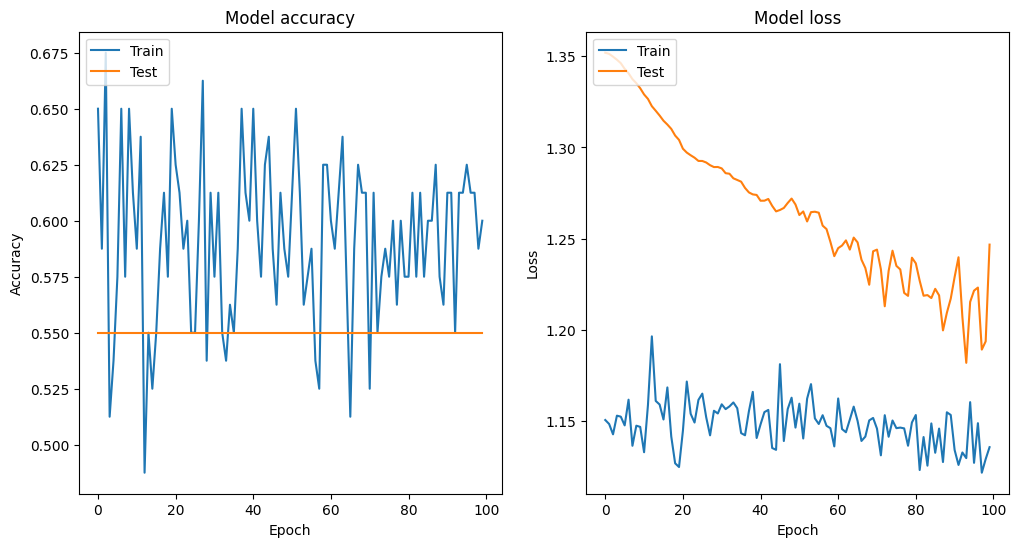

In [116]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

THE ABOVE MODEL WAS CREATED BY https://www.kaggle.com/code/vipulshahi/edux-dicom-data-cnn/

CREATING MY PERSONAL MODEL TO IMPROVE THE PREVIOUS MODEL


In [84]:
from tensorflow.keras import models, layers, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [95]:


model2 = models.Sequential()

# Convolutional layers with batch normalization and dropout
# Reduced the number of filters and used 'he_uniform' initializer
model2.add(layers.Conv2D(32, (3,3), padding='same', kernel_initializer='he_uniform', input_shape=(256,256,1)))
model2.add(layers.BatchNormalization())
model2.add(layers.Activation('relu'))
model2.add(layers.Conv2D(32, (3,3), padding='same', kernel_initializer='he_uniform'))
model2.add(layers.BatchNormalization())
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.25)) # Dropout

model2.add(layers.Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform', input_shape=(256,256,1)))
model2.add(layers.BatchNormalization())
model2.add(layers.Activation('relu'))
model2.add(layers.Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform'))
model2.add(layers.BatchNormalization())
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.25)) # Dropout

model2.add(layers.Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform', input_shape=(256,256,1)))
model2.add(layers.BatchNormalization())
model2.add(layers.Activation('relu'))
model2.add(layers.Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform'))
model2.add(layers.BatchNormalization())
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.25)) # Dropout

model2.add(layers.Conv2D(256, (3,3), padding='same', kernel_initializer='he_uniform', input_shape=(256,256,1)))
model2.add(layers.BatchNormalization())
model2.add(layers.Activation('relu'))
model2.add(layers.Conv2D(256, (3,3), padding='same', kernel_initializer='he_uniform'))
model2.add(layers.BatchNormalization())
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D(pool_size=(2,2)))
model2.add(layers.Dropout(0.25)) # Dropout


model2.add(layers.Flatten())

# Dense layer with dropout
model2.add(layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))

# Output layer
model2.add(layers.Dense(2, activation='softmax'))









In [96]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 256, 256, 32)      320       
                                                                 
 batch_normalization_9 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                                
                                                                 
 activation_22 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 conv2d_23 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization_10 (Ba  (None, 256, 256, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_23 (Activation)  (None, 256, 256, 32)     

In [97]:
# Optimizer with a lower learning rate
sgd = optimizers.SGD(lr=0.001, momentum=0.9)
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
mcp_save = ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min')


In [99]:
datagen2 = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.5, 1.5),
    vertical_flip=True,  # Added vertical flipping
    fill_mode='nearest'  # Pixels filled based on the nearest ones
)


In [100]:

# Fit model with callbacks
history = model2.fit(datagen2.flow(X_train_normalized, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(X_test_normalized, y_test),
                    callbacks=[early_stopping, mcp_save, reduce_lr])

Epoch 1/100
3/3 [==============================] - 1s 425ms/step - loss: 0.7952 - accuracy: 0.6000 - val_loss: 4.7767 - val_accuracy: 0.2500 - lr: 4.0000e-04
Epoch 2/100
3/3 [==============================] - 1s 304ms/step - loss: 0.8112 - accuracy: 0.6250 - val_loss: 3.8739 - val_accuracy: 0.3000 - lr: 4.0000e-04
Epoch 3/100
3/3 [==============================] - 1s 530ms/step - loss: 0.7290 - accuracy: 0.6125 - val_loss: 3.1467 - val_accuracy: 0.3000 - lr: 4.0000e-04
Epoch 4/100
3/3 [==============================] - 1s 332ms/step - loss: 0.7731 - accuracy: 0.5625 - val_loss: 2.6855 - val_accuracy: 0.3000 - lr: 4.0000e-04
Epoch 5/100
3/3 [==============================] - 1s 369ms/step - loss: 0.7260 - accuracy: 0.6375 - val_loss: 2.3170 - val_accuracy: 0.3000 - lr: 4.0000e-04
Epoch 6/100
3/3 [==============================] - 1s 315ms/step - loss: 0.7873 - accuracy: 0.6000 - val_loss: 2.0368 - val_accuracy: 0.3000 - lr: 4.0000e-04
Epoch 7/100
3/3 [==============================] - 1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 3s 1s/step - loss: 0.6911 - accuracy: 0.6625 - val_loss: 0.9949 - val_accuracy: 0.6500 - lr: 4.0000e-04
Epoch 13/100
3/3 [==============================] - 1s 317ms/step - loss: 0.7645 - accuracy: 0.6125 - val_loss: 0.8957 - val_accuracy: 0.6500 - lr: 4.0000e-04
Epoch 14/100
3/3 [==============================] - 2s 873ms/step - loss: 0.8412 - accuracy: 0.5000 - val_loss: 0.8231 - val_accuracy: 0.7000 - lr: 4.0000e-04
Epoch 15/100
3/3 [==============================] - 1s 519ms/step - loss: 0.6589 - accuracy: 0.5500 - val_loss: 0.7669 - val_accuracy: 0.7000 - lr: 4.0000e-04
Epoch 16/100
3/3 [==============================] - 1s 405ms/step - loss: 0.7297 - accuracy: 0.5750 - val_loss: 0.7330 - val_accuracy: 0.7000 - lr: 4.0000e-04
Epoch 17/100
3/3 [==============================] - 1s 307ms/step - loss: 0.7777 - accuracy: 0.5750 - val_loss: 0.7065 - val_accuracy: 0.7000 - lr: 4.0000e-04
Epoch 18/100
3/3 [==============================] - 1s 404ms/s

In [101]:
# Load the best model
model2.load_weights('best_model.hdf5')

In [102]:
model2.evaluate(datagen2.flow(X_train_normalized,y_train))

3/3 [==============================] - 1s 209ms/step - loss: 0.7251 - accuracy: 0.6500


[0.7251100540161133, 0.6499999761581421]

In [103]:
model2.evaluate(datagen2.flow(X_test_normalized,y_test))

1/1 [==============================] - 0s 190ms/step - loss: 0.7588 - accuracy: 0.7000


[0.7587946057319641, 0.699999988079071]

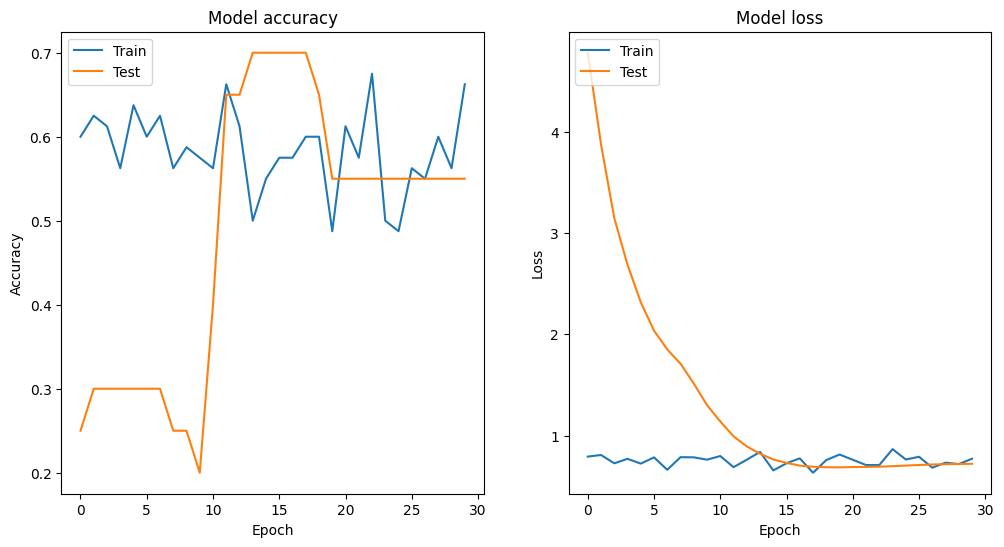

In [104]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


Creating THIRD MODEL

In [105]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [108]:


# Define the model architecture
model3 = models.Sequential()

# Initial Convolutional Layers
model3.add(layers.Conv2D(32, (3,3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(256,256,1)))
model3.add(layers.MaxPooling2D(pool_size=(2,2)))

model3.add(layers.Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform', activation='relu'))
model3.add(layers.MaxPooling2D(pool_size=(2,2)))

# Add dropout to prevent overfitting
model3.add(layers.Dropout(0.5))

# Add more layers, but with dropout and fewer filters to reduce complexity
model3.add(layers.Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform', activation='relu'))
model3.add(layers.MaxPooling2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.5))

model3.add(layers.Flatten())

# Dense layer with L2 regularization
model3.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dropout(0.5))

# Output layer
model3.add(layers.Dense(2, activation='softmax'))

# Compile the model with Adam optimizer and a suitable learning rate
optimizer = Adam(lr=0.001)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
mcp_save = ModelCheckpoint('best_model_improved.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min')




In [109]:
# Fit model with callbacks
history_2 = model3.fit(
    datagen2.flow(X_train_normalized, y_train, batch_size=32),
    epochs=100,
    validation_data=(X_test_normalized, y_test),
    callbacks=[early_stopping, mcp_save, reduce_lr]
)


Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 11.2649 - accuracy: 0.4125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 5s 1s/step - loss: 11.2649 - accuracy: 0.4125 - val_loss: 5.1027 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 1s 242ms/step - loss: 7.0615 - accuracy: 0.5500 - val_loss: 2.2270 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 1s 166ms/step - loss: 5.5927 - accuracy: 0.5750 - val_loss: 1.0287 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 1s 554ms/step - loss: 2.6496 - accuracy: 0.5500 - val_loss: 1.0604 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 1s 159ms/step - loss: 1.9074 - accuracy: 0.5250 - val_loss: 1.0950 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 6/100
3/3 [==============================] - 1s 162ms/step - loss: 1.3023 - accuracy: 0.4625 - val_loss: 1.1191 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 7/100
3/3 [==============================] - 1s 163ms/step - loss: 1.1802 - accuracy

In [110]:

# Load the best model
model3.load_weights('best_model_improved.hdf5')

# Evaluate the model
evaluation = model3.evaluate(X_test_normalized, y_test)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

1/1 [==============================] - 0s 46ms/step - loss: 1.0604 - accuracy: 0.7000
Test Loss: 1.060429573059082, Test Accuracy: 0.699999988079071


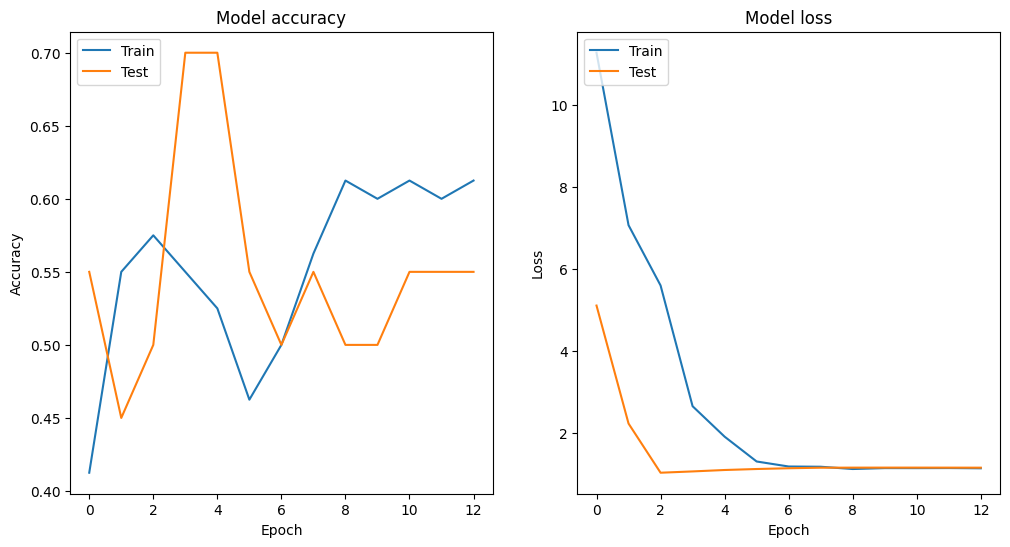

In [112]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [117]:
from tensorflow.keras import models, layers, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [118]:


# Define the model architecture
model4 = models.Sequential()

# Initial Convolutional Layers
model4.add(layers.Conv2D(32, (3,3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(256,256,1)))
model4.add(layers.MaxPooling2D(pool_size=(2,2)))
model4.add(layers.Dropout(0.25)) # Dropout to prevent overfitting

model4.add(layers.Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform', activation='relu'))
model4.add(layers.MaxPooling2D(pool_size=(2,2)))
model4.add(layers.Dropout(0.25)) # Dropout to prevent overfitting

# Here we can consider adding more layers, but be cautious of overfitting
model4.add(layers.Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform', activation='relu'))
model4.add(layers.MaxPooling2D(pool_size=(2,2)))
model4.add(layers.Dropout(0.25)) # Dropout to prevent overfitting

model4.add(layers.Flatten())

# Dense layer with L2 regularization
model4.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model4.add(layers.Dropout(0.5)) # Higher dropout for dense layer

# Output layer
model4.add(layers.Dense(2, activation='softmax'))

# Compile the model with Adam optimizer and include a learning rate scheduler
optimizer = optimizers.Adam(lr=0.001)
model4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping, model checkpointing, and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
mcp_save = ModelCheckpoint('best_model_improved.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min')








In [119]:
# Fit the model with callbacks
new_history = model4.fit(
    X_train_normalized, y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_test_normalized, y_test),
    callbacks=[early_stopping, mcp_save, reduce_lr]
)

Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 43.6115 - accuracy: 0.4250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 3s 718ms/step - loss: 43.6115 - accuracy: 0.4250 - val_loss: 12.7865 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 0s 107ms/step - loss: 26.8839 - accuracy: 0.5250 - val_loss: 3.4434 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 5.8624 - accuracy: 0.5500 - val_loss: 1.1625 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 0s 116ms/step - loss: 2.9460 - accuracy: 0.5875 - val_loss: 1.2953 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 0s 106ms/step - loss: 1.9576 - accuracy: 0.5250 - val_loss: 1.1033 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 6/100
3/3 [==============================] - 1s 503ms/step - loss: 1.1313 - accuracy: 0.6000 - val_loss: 1.1448 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/100
3/3 [==============================] - 0s 113ms/step - loss: 1.1121 - accura

In [120]:
# Load the best model
model4.load_weights('best_model_improved.hdf5')

In [121]:
# Evaluate the model
evaluation = model4.evaluate(X_test_normalized, y_test)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

1/1 [==============================] - 0s 39ms/step - loss: 1.1448 - accuracy: 0.7500
Test Loss: 1.144781470298767, Test Accuracy: 0.75


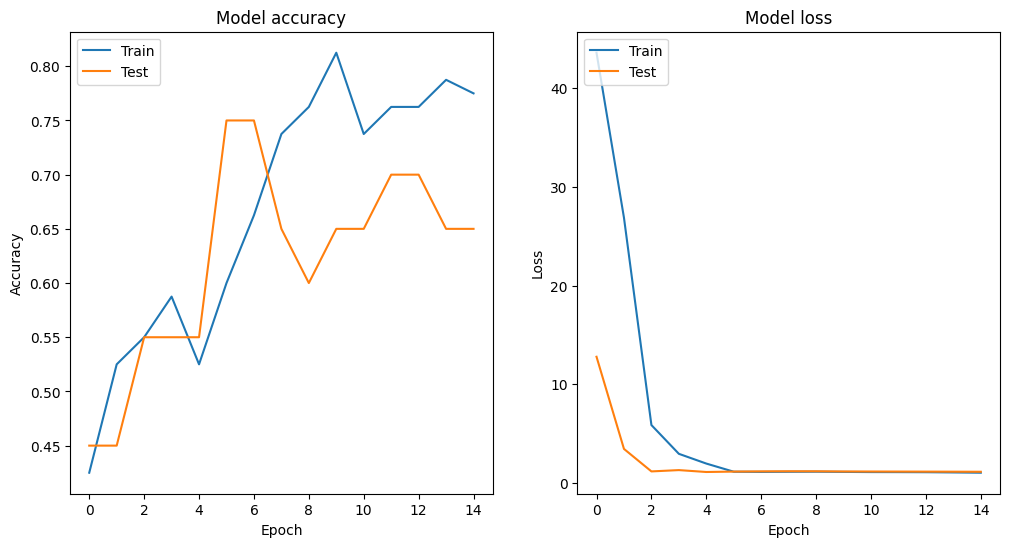

In [122]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(new_history.history['accuracy'])
plt.plot(new_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(new_history.history['loss'])
plt.plot(new_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [123]:

# Initialize the model
model5 = models.Sequential()

# Add convolutional layers with increasing filters and dropout for regularization
model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1), padding='same'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Dropout(0.25))

model5.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Dropout(0.25))

model5.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Dropout(0.25))

# Flatten the output of the convolutional layers
model5.add(layers.Flatten())

# Add a fully connected layer with dropout
model5.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model5.add(layers.Dropout(0.5))

# Output layer with softmax activation for classification
model5.add(layers.Dense(2, activation='softmax'))

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model5.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=1)
mcp_save = ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')



In [124]:
# Fit the model with the new callbacks
model_history = model5.fit(
    X_train_normalized, y_train,
    validation_data=(X_test_normalized, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr, mcp_save]
)



Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 3.8507 - accuracy: 0.5250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 44s 21s/step - loss: 3.8507 - accuracy: 0.5250 - val_loss: 1.0528 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 2s 760ms/step - loss: 1.6447 - accuracy: 0.5125 - val_loss: 0.9303 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 0s 174ms/step - loss: 0.9325 - accuracy: 0.6375 - val_loss: 0.9503 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 0s 123ms/step - loss: 0.9494 - accuracy: 0.6000 - val_loss: 0.9586 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 0s 160ms/step - loss: 0.9545 - accuracy: 0.5625 - val_loss: 0.9529 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 6/100
3/3 [==============================] - 0s 175ms/step - loss: 0.9437 - accuracy: 0.5625 - val_loss: 0.9333 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 7/100
3/3 [==============================] - 0s 126ms/step - loss: 0.9138 - accurac

In [125]:
# Evaluate the model using the test data
evaluation = model5.evaluate(X_test_normalized, y_test)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

1/1 [==============================] - 0s 51ms/step - loss: 0.9303 - accuracy: 0.8500
Test Loss: 0.9302763938903809, Test Accuracy: 0.8500000238418579


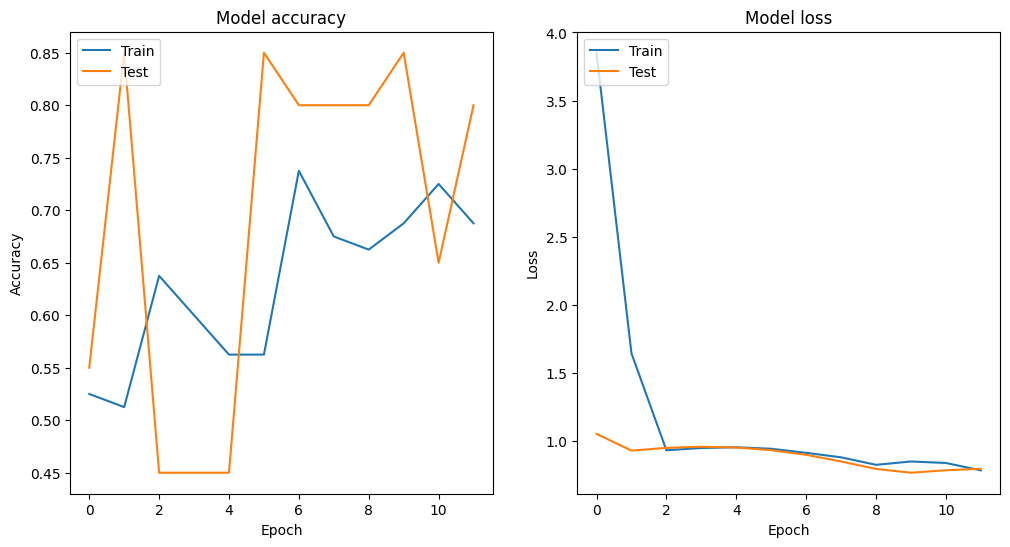

In [126]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()